# Differential evolution

Algorithm: https://en.wikipedia.org/wiki/Differential_evolution

In [1]:
from IPython.display import clear_output
from modules.plotter import print_result
from modules.golomb_problem import init_simple_problem, init_medium_problem

import pygmo as pg
from scipy.optimize import differential_evolution

## Simple Problem

### SciPy

Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

N sat:  5 	Grid size:  11
Solution:  [ 0.38359283 -0.2989825   0.0802762  -0.06993153 -0.01218419 -0.42249991
  0.32659587 -0.29117902  0.27363434  0.09172907  0.39475997 -0.45918106
 -0.78997288  0.34266556  0.1574792  -0.05273158  0.25977139 -0.53895747
 -0.19923985 -0.37714532  0.93815234 -0.77510217  0.21844612 -0.2036206
  0.00882389  0.29149759 -0.82093432 -0.63649462  0.0617958  -0.81072989]
Default Fitness: -0.14285714285714285	Diverse Distances [%]: 0.3889	Satellites in Grid [%]: 1.0000


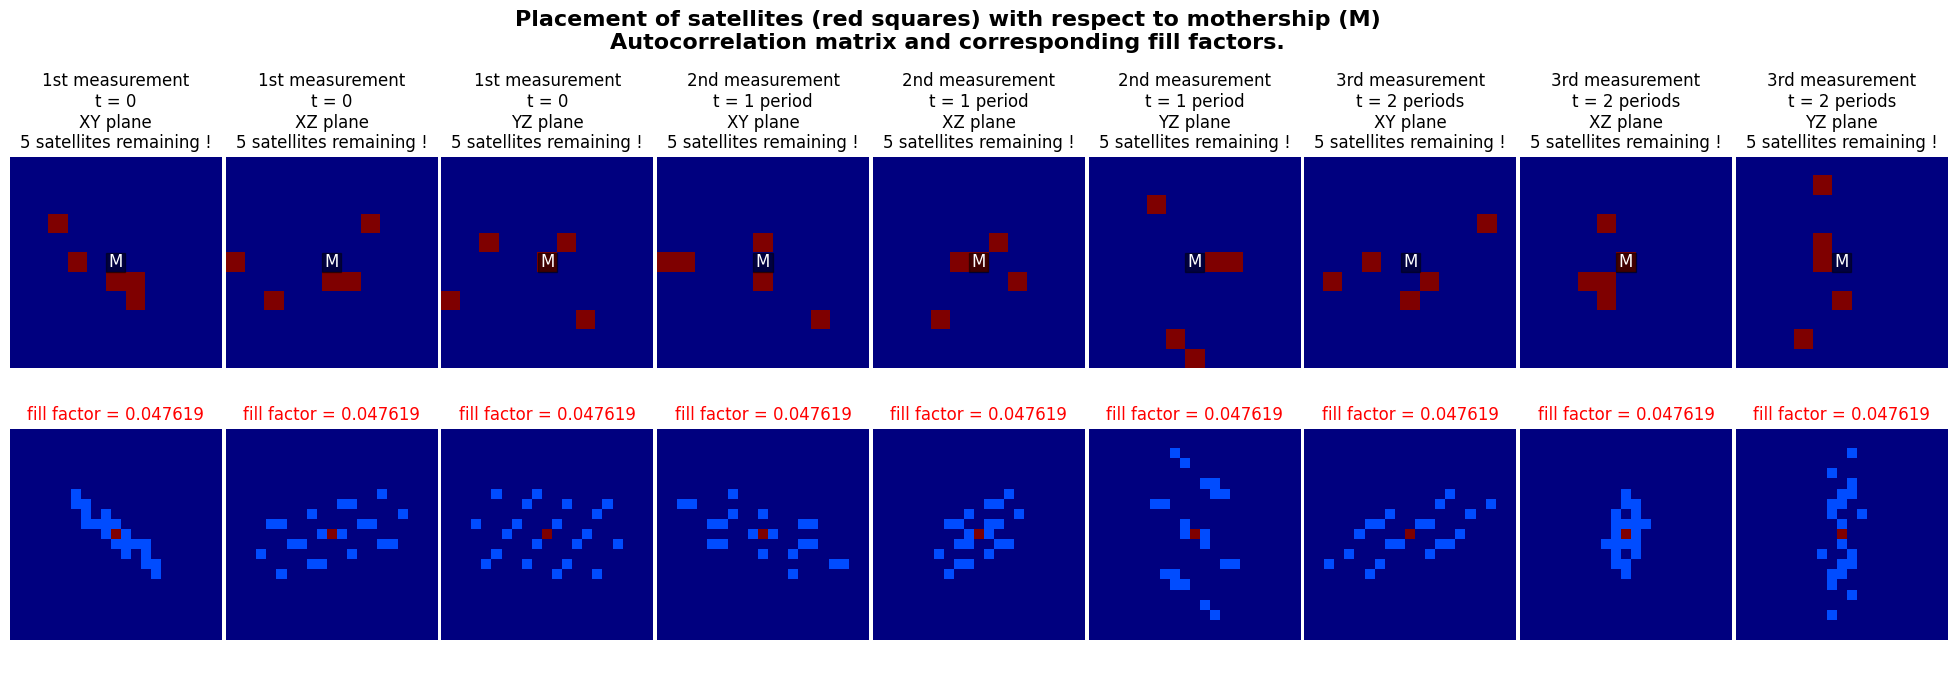

---

XY	SSIM = 13.0605%


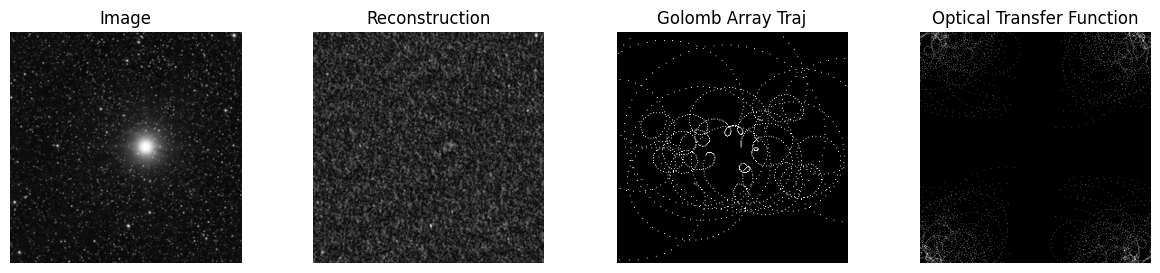

XZ	SSIM = 17.0673%


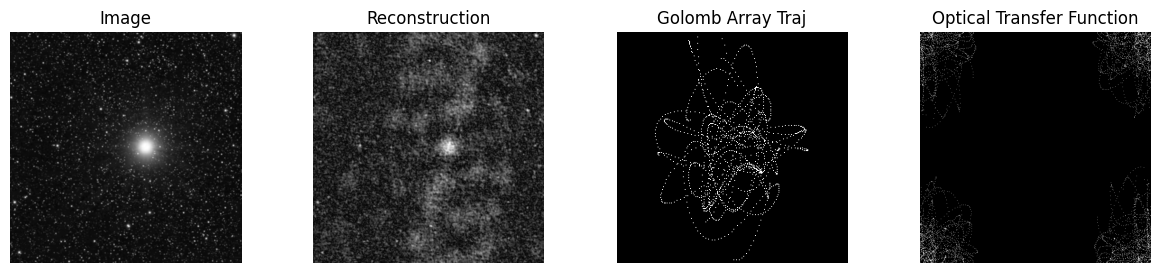

YZ	SSIM = 17.5712%


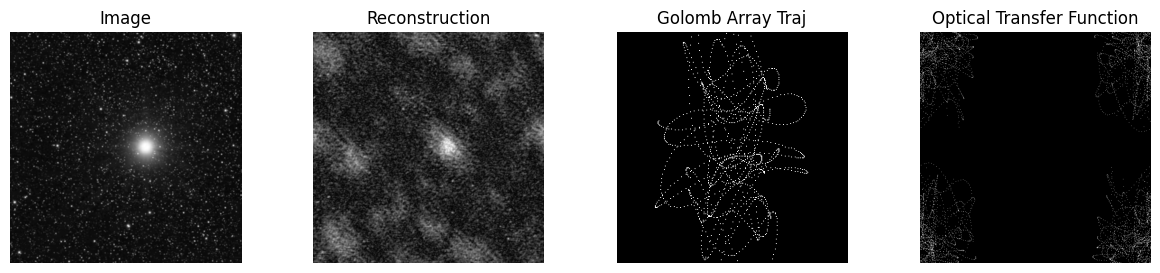

---

XY	SSIM = 12.4125%


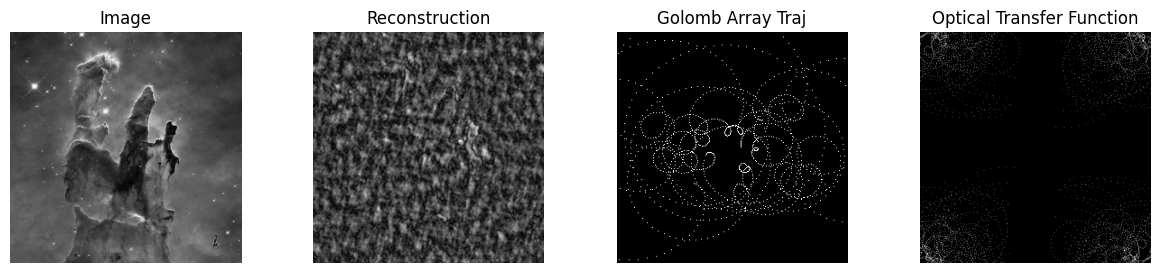

XZ	SSIM = 16.0106%


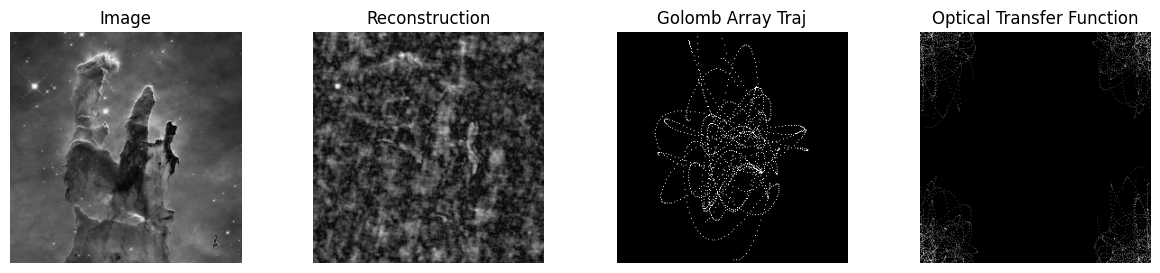

YZ	SSIM = 19.4303%


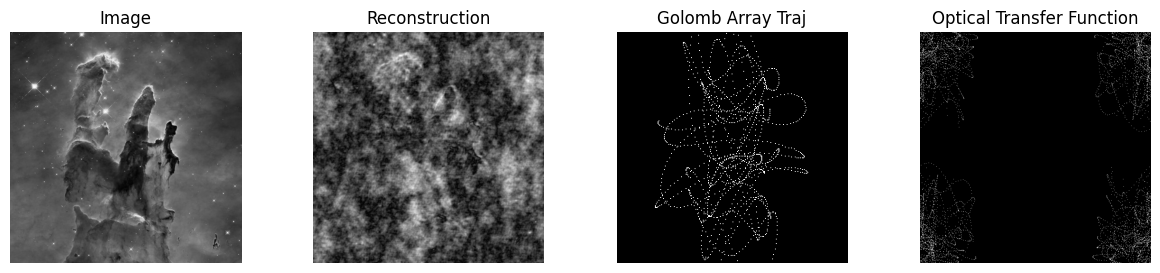

In [2]:
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None
UDP = init_simple_problem()

result = differential_evolution(
    func=lambda solution: UDP.fitness(solution)[0],
    x0=x0,
    maxiter=150,
    popsize=80,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x, show_simulated_reconstruction=True)
del UDP, x0, result

#### Force Golomb Optimal

N sat:  5 	Grid size:  11
Solution:  [ 8.32529692e-01  7.17781266e-02  1.33866350e-01  1.04154439e-01
 -1.94747125e-01 -8.68582515e-01 -1.82476356e-02  4.29433278e-02
 -4.63693347e-01  4.76913732e-01 -1.41964661e-01 -4.70300373e-01
 -4.40904538e-01 -7.62528511e-01  4.60197350e-01  4.29320247e-01
  4.96103662e-01 -6.81506645e-05 -7.88130530e-02 -4.75931422e-01
  2.79675293e-01  2.22604611e-01  3.55446683e-01  2.69984824e-01
 -5.62253071e-01  1.57956367e-01 -1.00310699e-01  7.89858677e-01
 -4.21133585e-01 -6.43133136e-01]
Default Fitness: -0.08843537414965986	Diverse Distances [%]: 0.5556	Satellites in Grid [%]: 0.8444


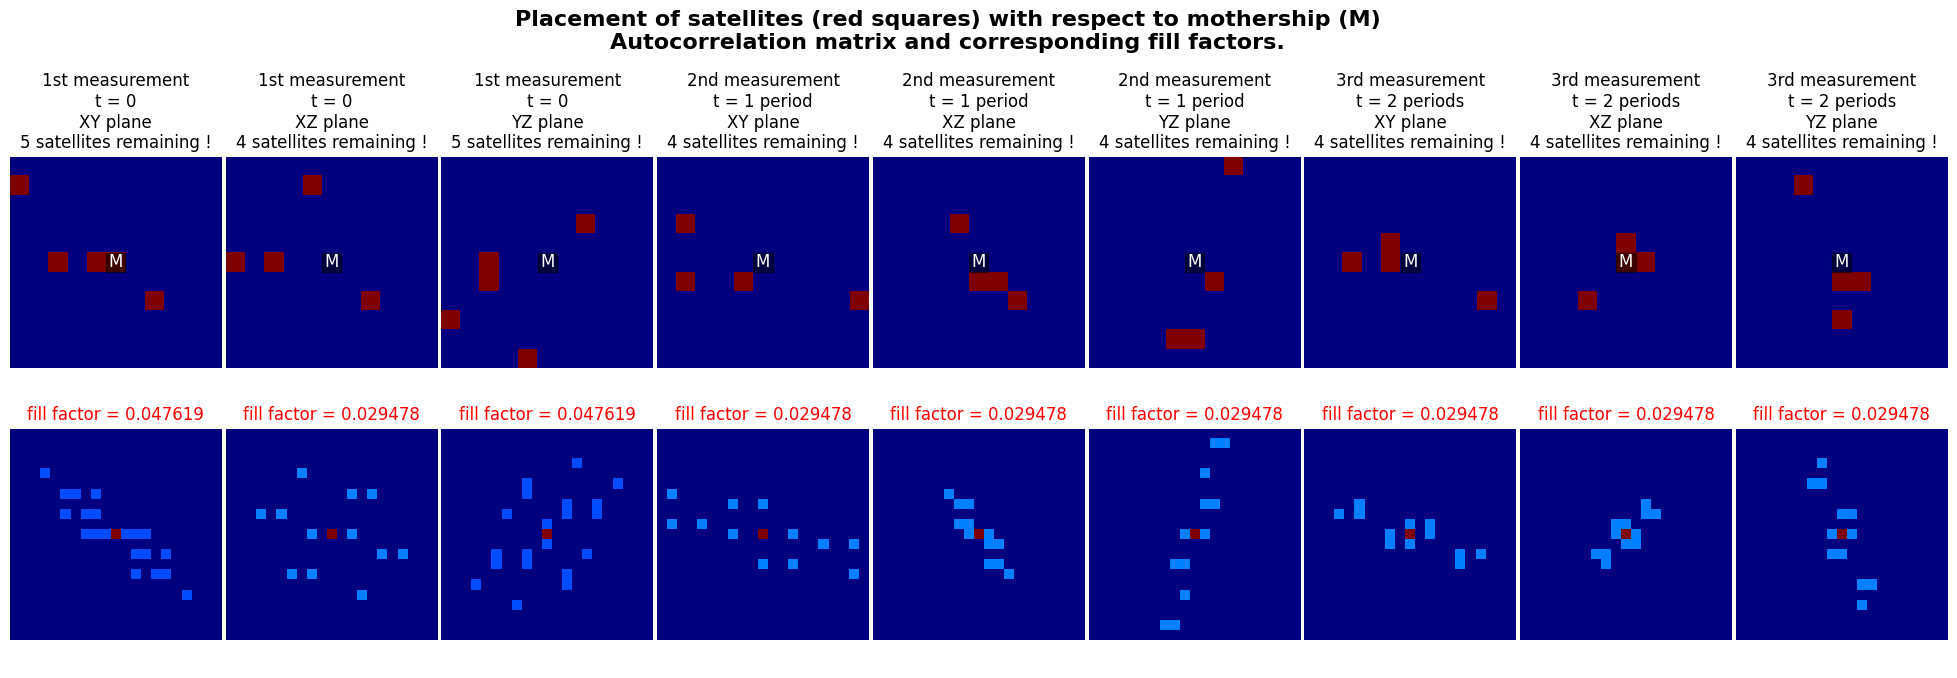

---

XY	SSIM = 16.5118%


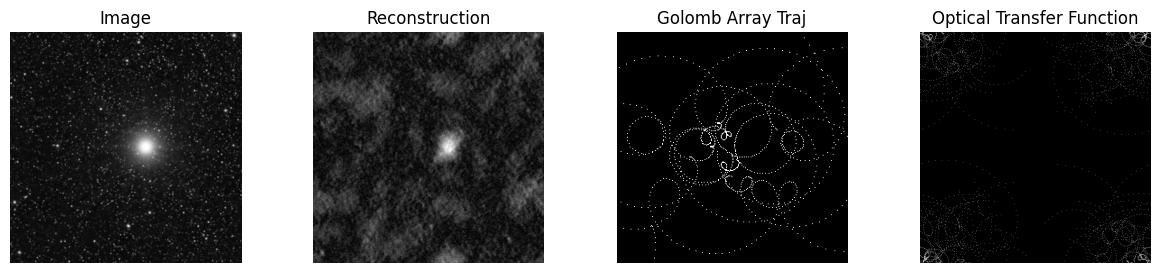

XZ	SSIM = 17.2826%


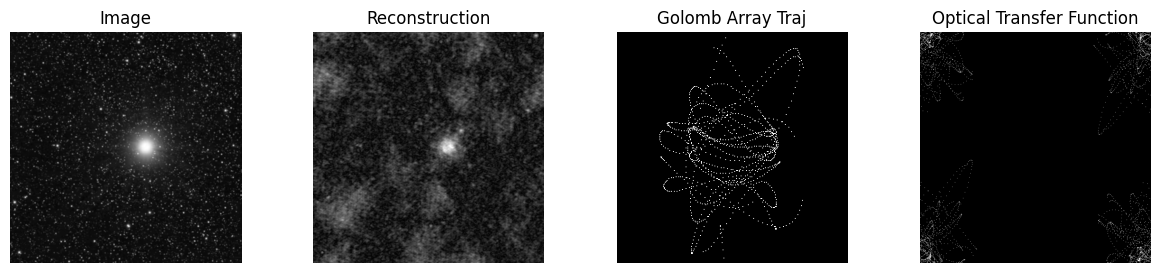

YZ	SSIM = 12.6616%


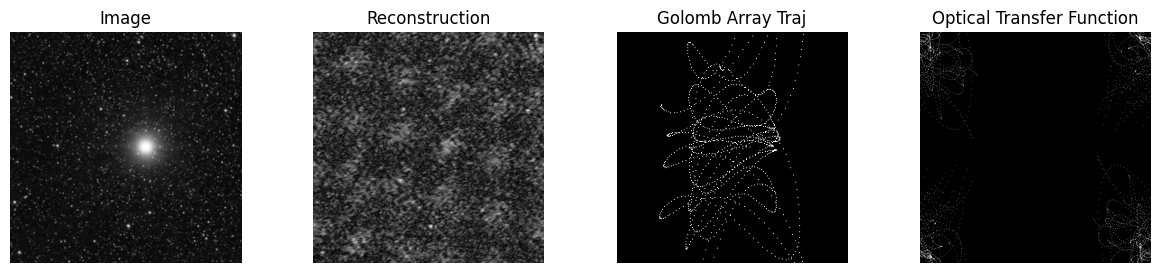

---

XY	SSIM = 17.6843%


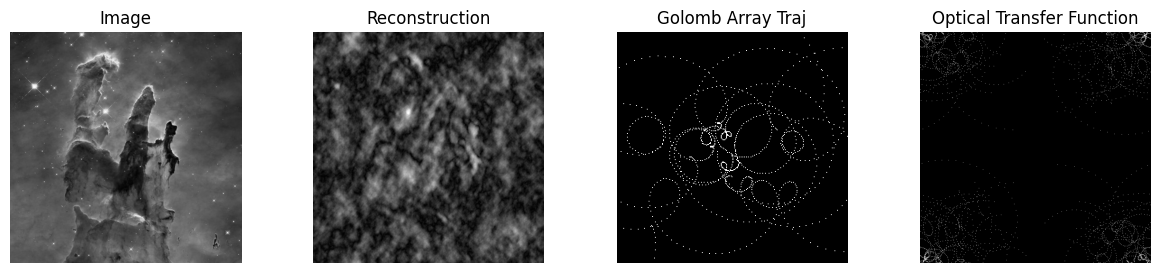

XZ	SSIM = 15.2249%


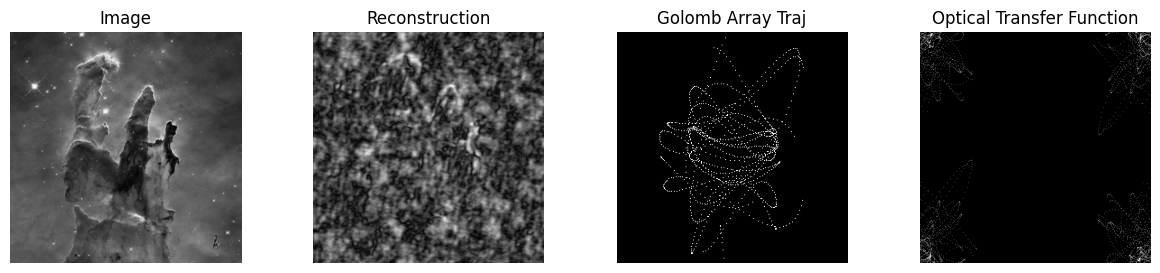

YZ	SSIM = 13.2004%


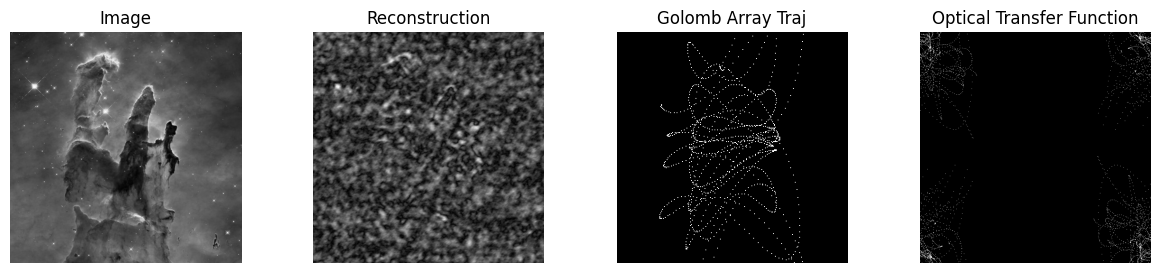

In [3]:
UDP = init_simple_problem()
# x0 = np.random.normal(0,0.4,30)
# x0 = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0, 0.2, -0.1, 0.0, -0.2, 0.1, 0.4, 0.3, -0.2, -0.3, -0.0042, -0.0001, 0.0201, -0.0001, 0.0, -0.004, 0.001, 0.025, 0.003, 0.001, 0.0023, 0.0003, 0.0001, -0.01, -0.0117]
x0 = None

result = differential_evolution(
    func=lambda solution: UDP.fitness_impl(solution, reduce_fill_if_not_optimal=True)[0],
    x0=x0,
    maxiter=150,
    popsize=80,
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6,
    recombination=0.3,
    mutation=(0.1, 1),
    tol=0.001,  # Reduced tolerance for first iteration
    polish=True,
    disp=True,
)

clear_output()
print_result(UDP, result.x,show_simulated_reconstruction=True)
del UDP, x0, result

### PyGMO2

Doc: https://esa.github.io/pygmo2/overview.html

#### Self-adaptive Differential Evolution


   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             90    -0.00680272       0.111984       0.251728        22.4558     0.00680272
      3            270    -0.00680272       0.111984       0.251728        18.9653     0.00680272
      5            450    -0.00680272       0.654219        0.87355        20.6783     0.00680272
      7            630    -0.00680272       0.394517       0.986075        20.6378     0.00680272
      9            810    -0.00680272       0.111984         0.2476        21.7361     0.00680272
     11            990    -0.00680272       0.111984         0.2476        20.5974     0.00680272
     13           1170    -0.00680272       0.179062       0.786557        20.1389     0.00680272
     15           1350    -0.00680272       0.394517       0.986075        18.6569     0.00680272
     17           1530    -0.00680272       0.676006       0.364801        17.0875     0.00680272
     19           1

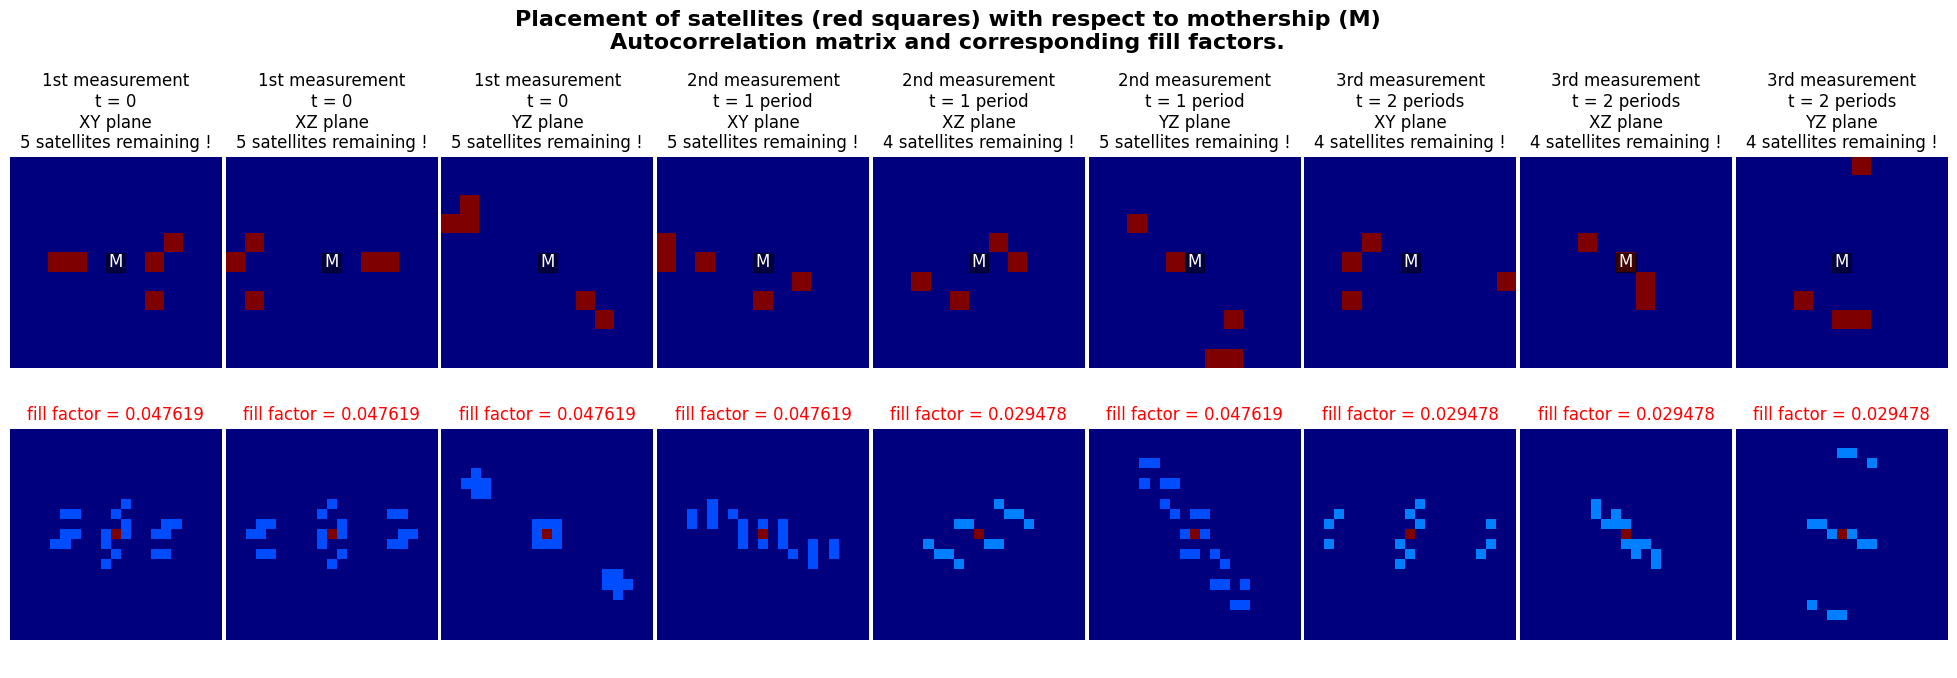

---

XY	SSIM = 15.4034%


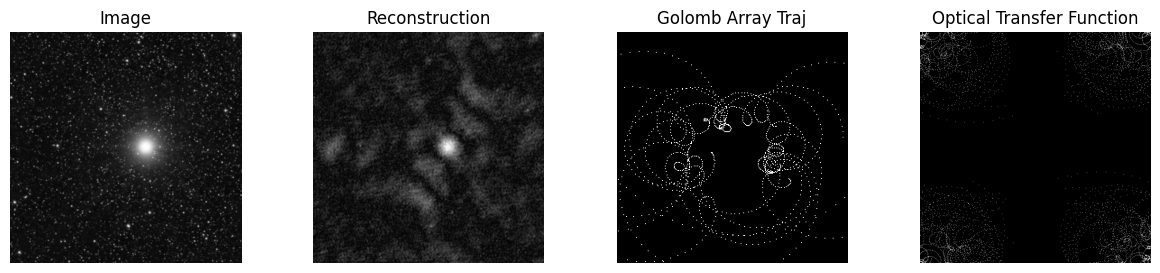

XZ	SSIM = 17.4755%


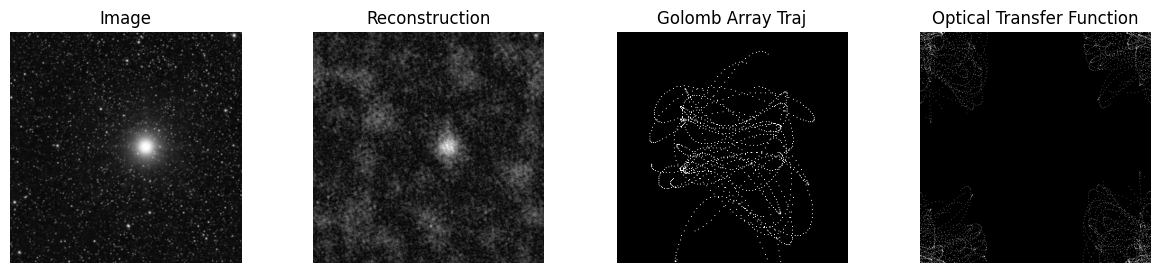

YZ	SSIM = 17.1492%


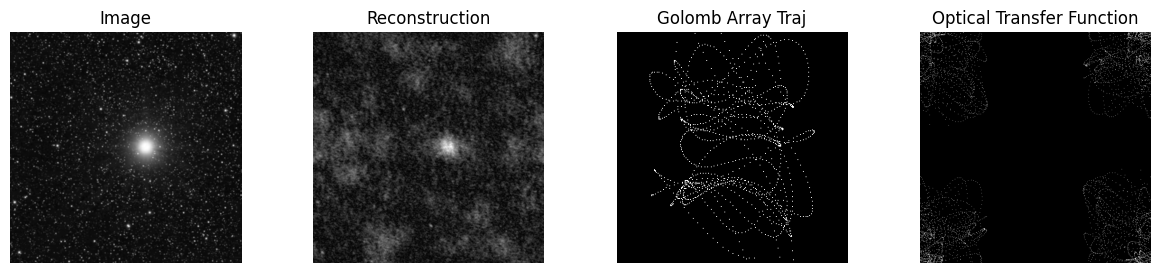

---

XY	SSIM = 16.5089%


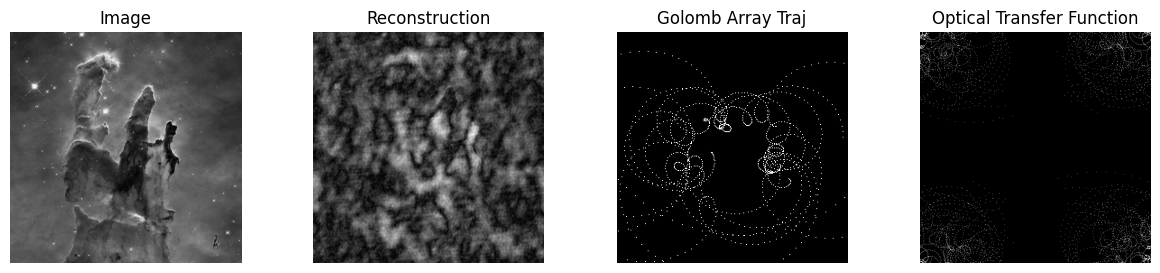

XZ	SSIM = 17.3219%


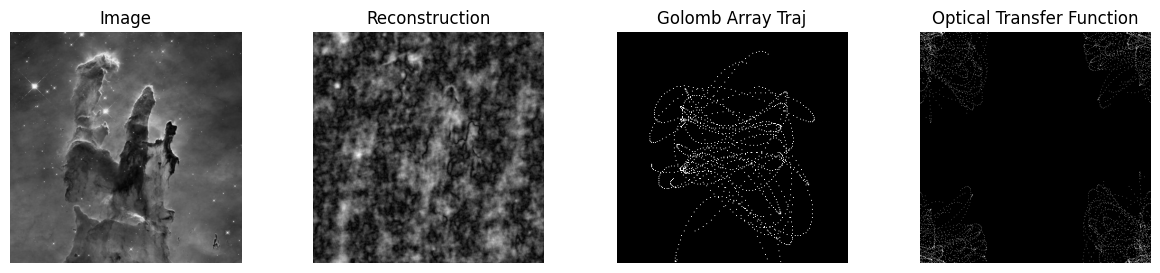

YZ	SSIM = 18.4740%


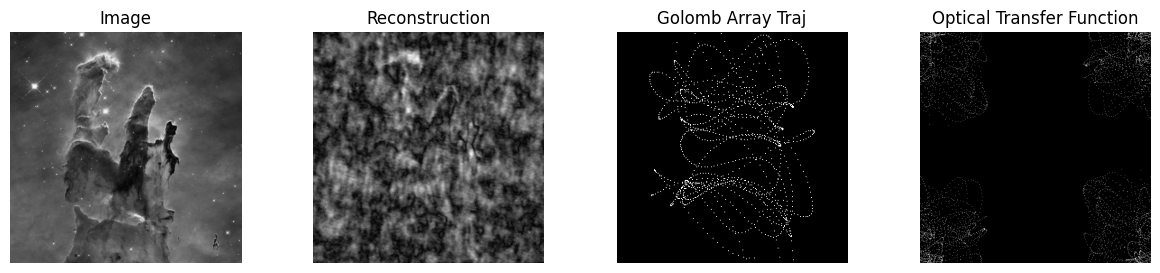

In [4]:
UDP = init_simple_problem()
algo = pg.algorithm(
    pg.sade(
        gen=300, 
        variant=2, 
        variant_adptv=1, 
        ftol=0, 
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=90)
evolve = algo.evolve(pop)

print_result(UDP,evolve.champion_x,show_simulated_reconstruction=True)
del UDP, algo, prob, pop, evolve

#### Self-adaptive Differential Evolution in pygmo flavour (pDE)

The adaptation of the mutation variant is added to `pygmo.sade`


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1             90    -0.00680272       0.525194       0.581635             12        20.0144     0.00680272
      3            270    -0.00680272       0.819455       0.360244             10        17.6151     0.00680272
      5            450    -0.00680272       0.847282       0.924648             18        18.5774     0.00680272
      7            630    -0.00680272         0.9814       0.142104             10        19.3079     0.00680272
      9            810    -0.00680272       0.417753        0.85184              5        20.0436     0.00680272
     11            990    -0.00680272       0.270756       0.234943              7        19.2773     0.00680272
     13           1170     -0.0204082       0.417094       0.128247              7        16.0111      0.0204082
     15           1350     -0.0204082       0.417094       0.128247              7         19.8

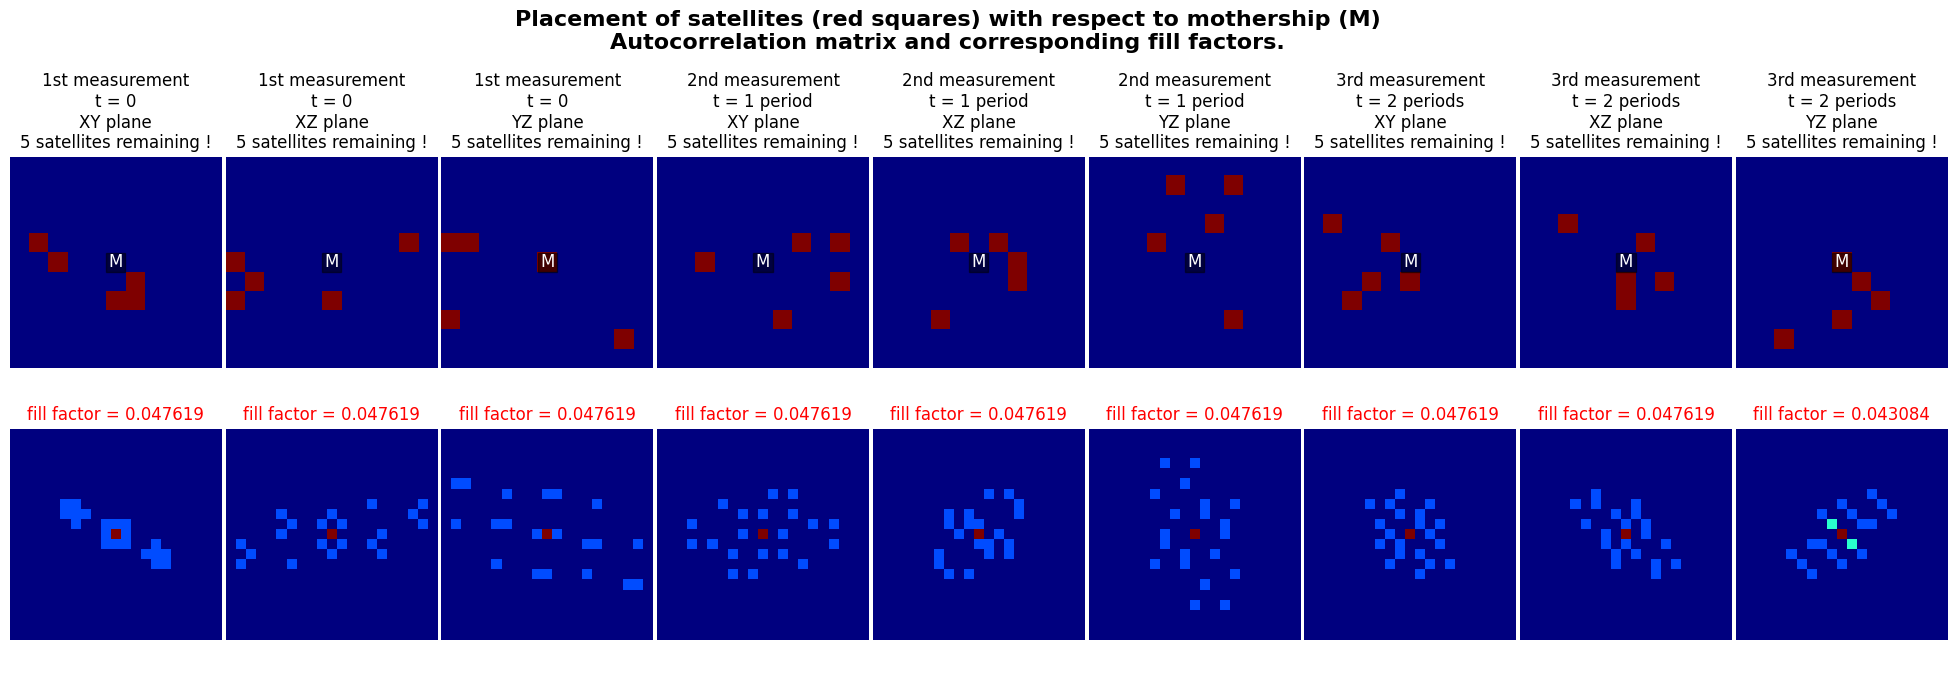

---

XY	SSIM = 16.5792%


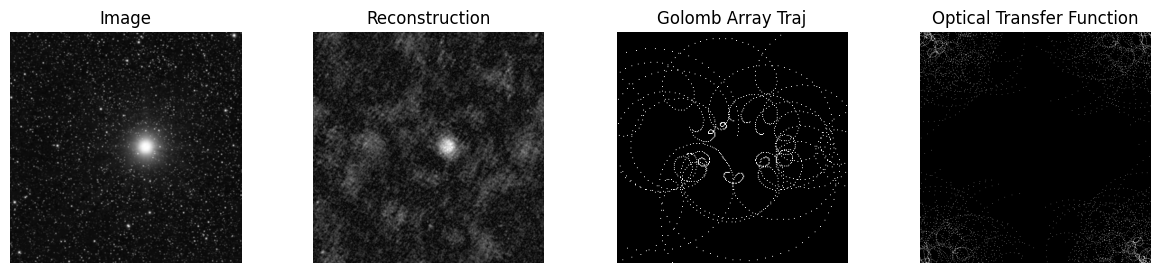

XZ	SSIM = 17.5797%


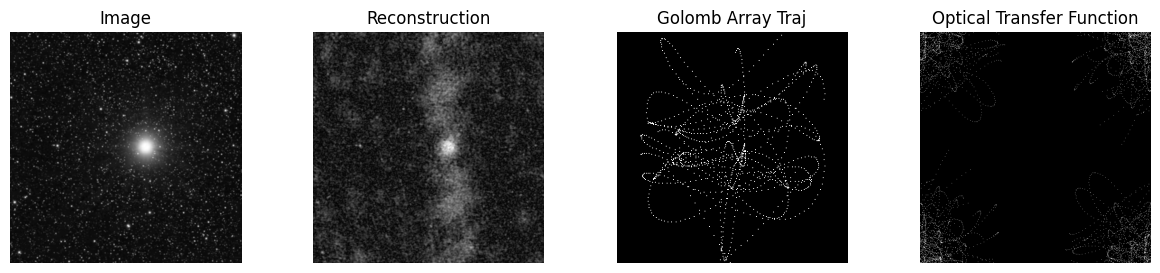

YZ	SSIM = 14.0463%


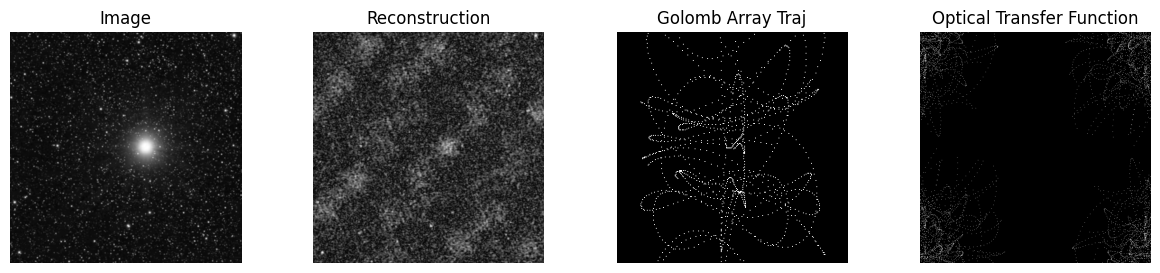

---

XY	SSIM = 16.9542%


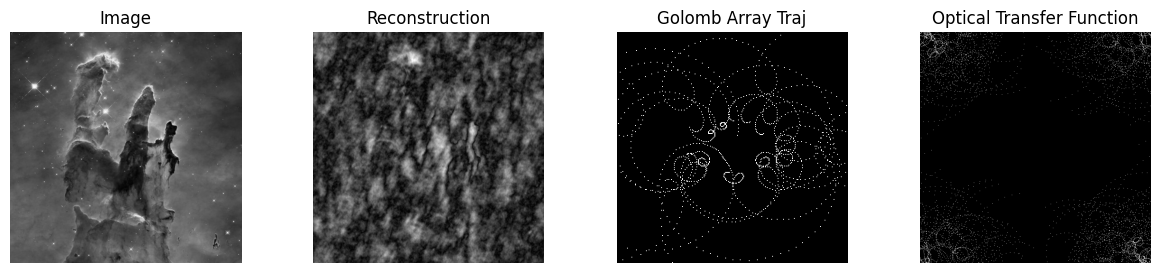

XZ	SSIM = 17.6416%


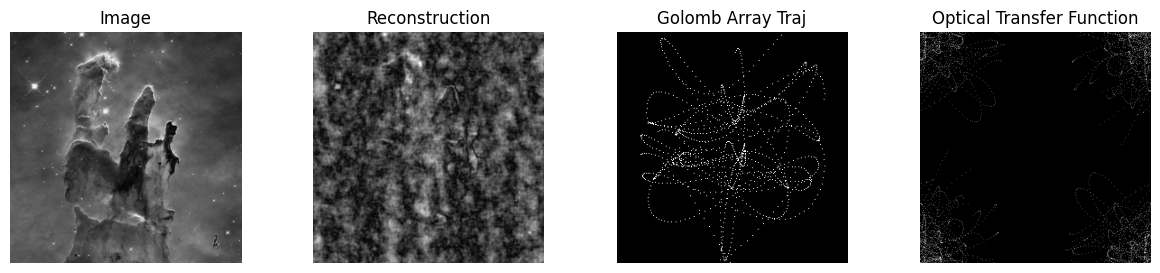

YZ	SSIM = 12.7590%


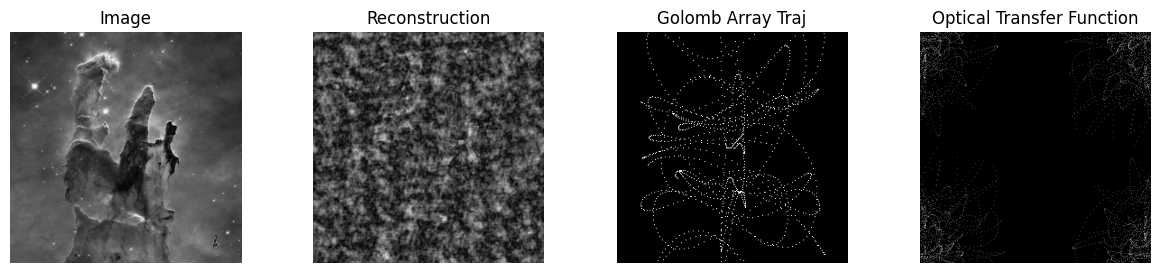

In [5]:
UDP = init_simple_problem()
algo = pg.algorithm(
    pg.de1220(
        gen=300, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=0, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(init_simple_problem())
pop = pg.population(prob,size=90)
evolve = algo.evolve(pop) 

print_result(UDP,evolve.champion_x,show_simulated_reconstruction=True)
del UDP, algo, prob, pop, evolve

## Medium Problem


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750     -0.0232005       0.128624       0.239912             14        155.079      0.0232005
      3           2250     -0.0374777       0.516557       0.381681              9        151.484      0.0374777
      5           3750     -0.0553242       0.114937       0.392752              8        142.365      0.0553242
      7           5250     -0.0553242       0.114937       0.392752              8        142.109      0.0553242
      9           6750     -0.0553242       0.114937       0.392752             17        130.404      0.0553242
     11           8250     -0.0600833        0.17713       0.414457              8        133.527      0.0600833
     13           9750     -0.0600833        0.17713       0.414457              8        126.498      0.0600833
     15          11250     -0.0600833        0.17713       0.414457              8        126.5

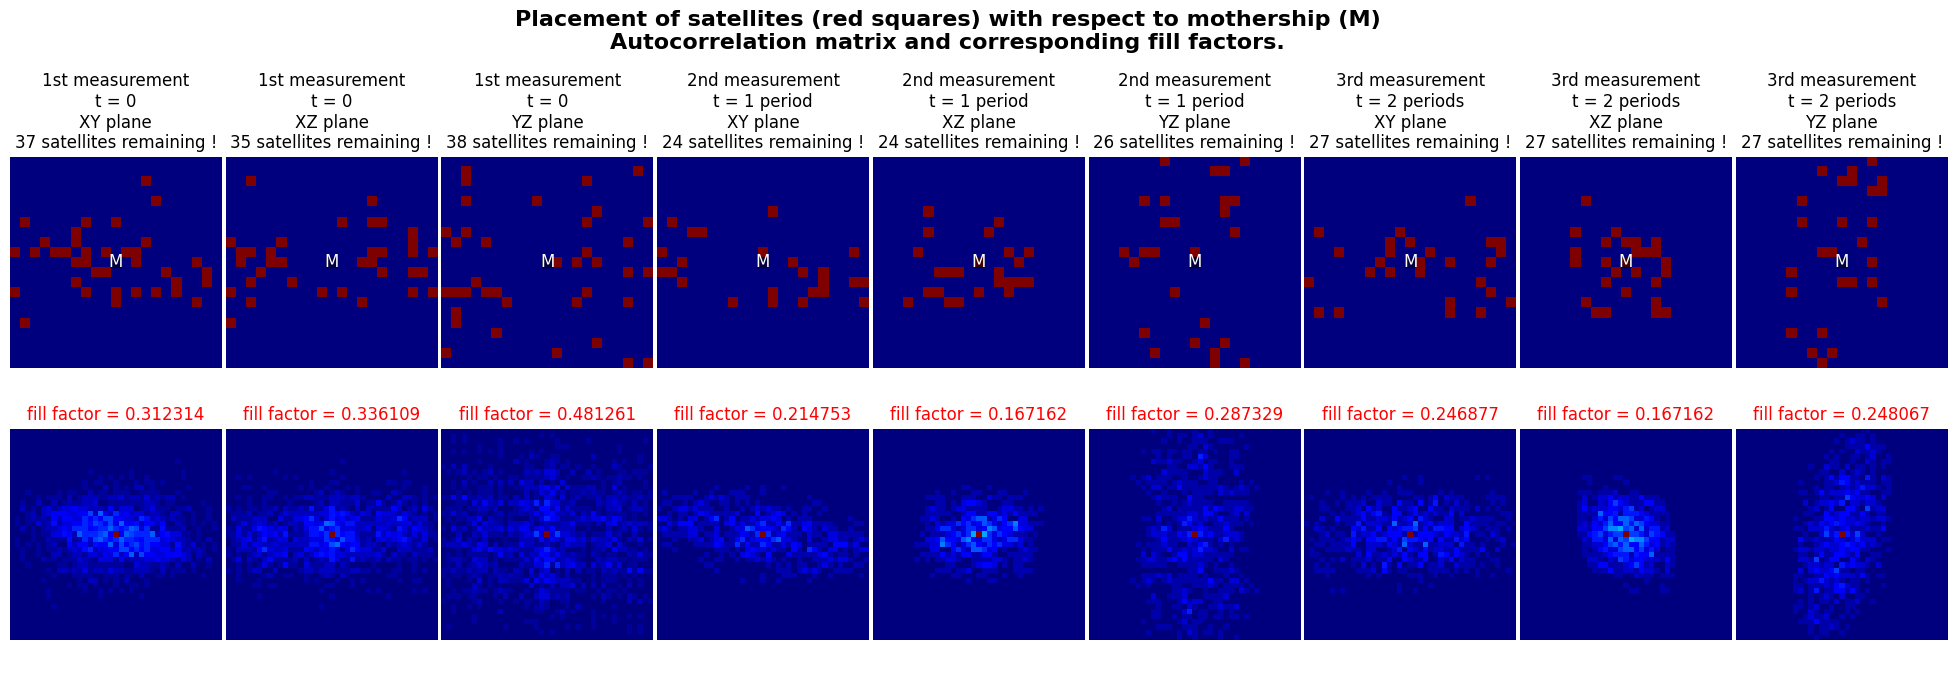

In [6]:
UDP_medium = init_medium_problem()
algo = pg.algorithm(
    pg.de1220(
        gen=2000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium) 
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,evolve.champion_x)
del algo, prob, pop, UDP_medium


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750     -0.0374777       0.159452      0.0720204             12        166.159      0.0374777
      3           2250     -0.0374777       0.159452      0.0720204             11        163.252      0.0374777
      5           3750     -0.0458061        0.63932       0.769231             11        163.351      0.0458061
      7           5250     -0.0529447        0.65094       0.356971             18        161.126      0.0529447
      9           6750     -0.0541344       0.409335       0.722743              8        152.086      0.0541344
     11           8250     -0.0731707        0.25171       0.592708             15        167.549      0.0731707
     13           9750     -0.0731707        0.25171       0.592708             17         167.57      0.0731707
     15          11250     -0.0731707       0.844698       0.592708             17        166.6

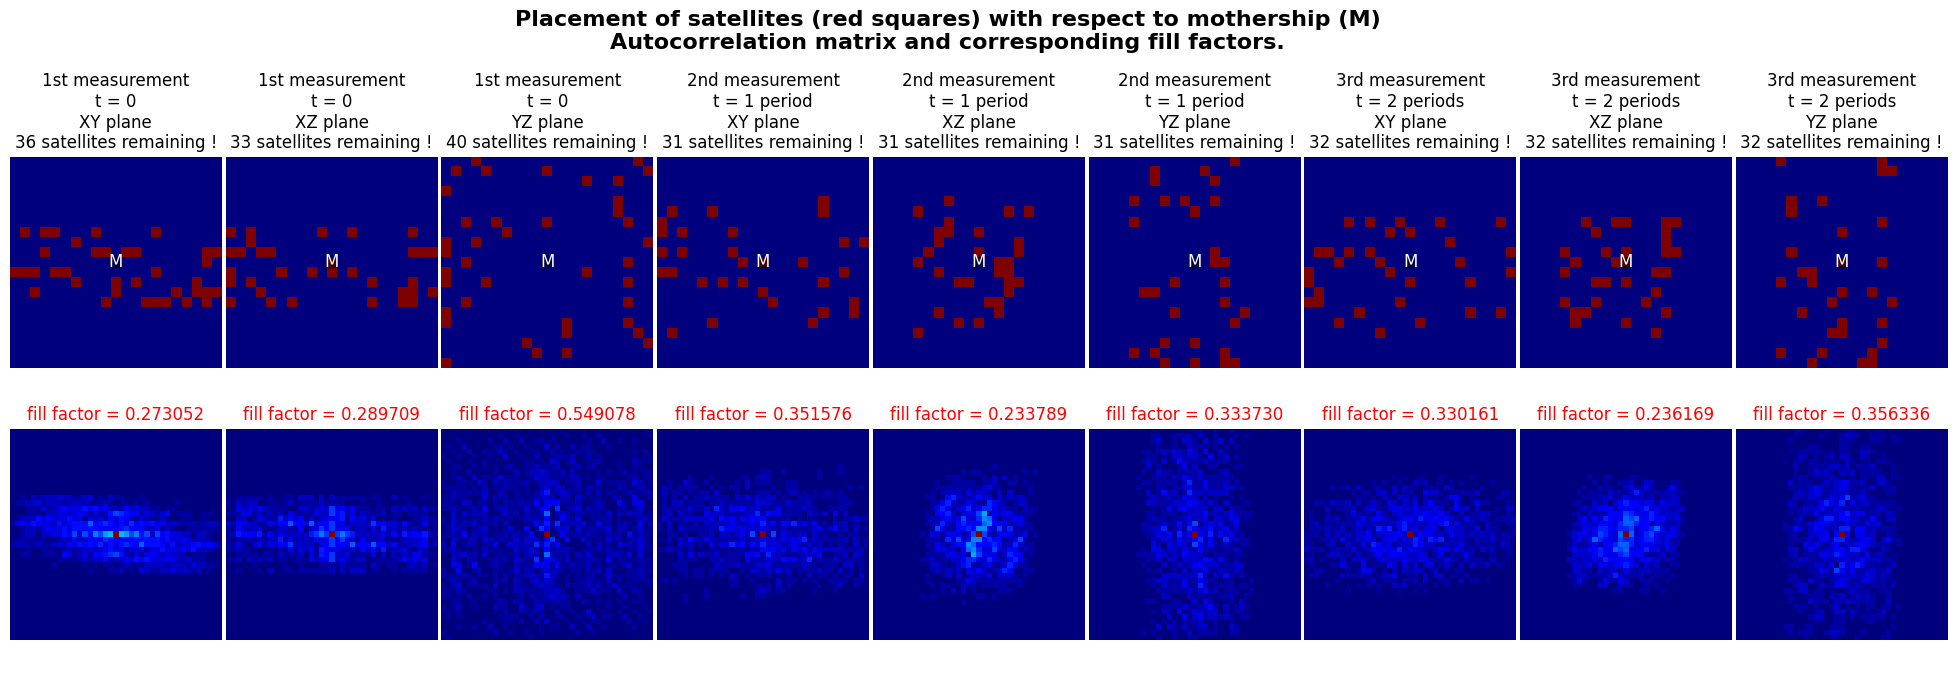

In [8]:
UDP_medium = init_medium_problem()
algo = pg.algorithm(
    pg.de1220(
        gen=5000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium) 
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,  evolve.champion_x)
del algo, prob, pop, UDP_medium

### Reduce if not optimal

--- 0.07684874534606934 seconds --- to build the Taylor integrator -- (do this only once)
--- 0.0017435550689697266 seconds --- to construct all stms

   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750    -0.00739982       0.407076       0.777293             13        159.449     0.00739982
      3           2250    -0.00747905       0.407076       0.777293             13        150.843     0.00747905
      5           3750    -0.00747905       0.407076       0.777293             13        141.543     0.00747905
      7           5250    -0.00789966        0.86674       0.217523             10        160.355     0.00789966
      9           6750    -0.00804295       0.999943       0.296949             18        155.565     0.00804295
     11           8250    -0.00947841       0.289521       0.853039             13        165.138     0.00947841
     13           9750    -0.00947841       0.289521      

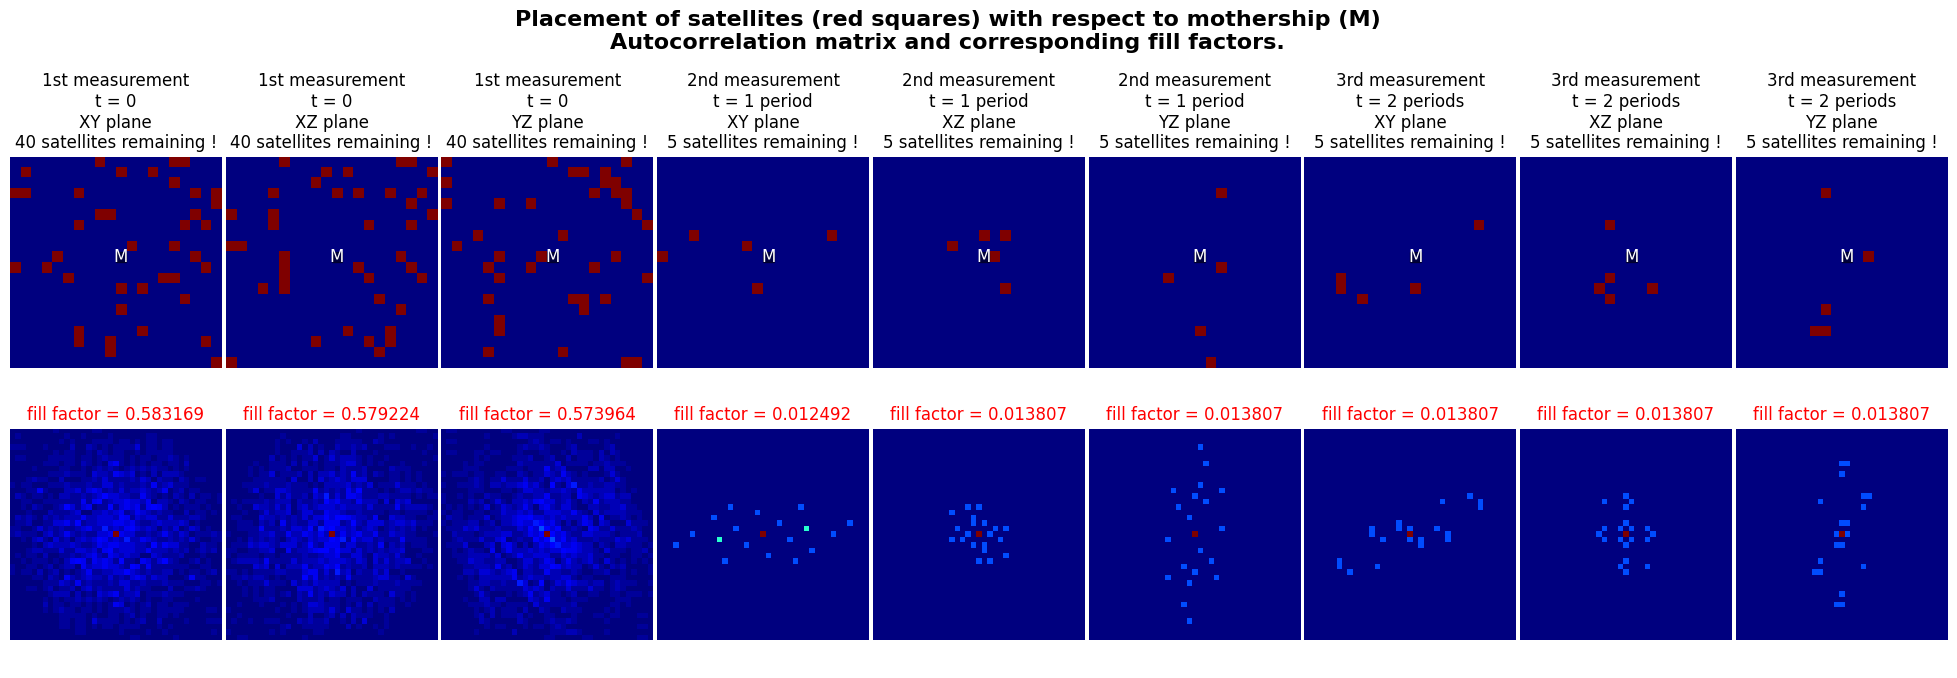

In [9]:
from modules.golomb_problem import orbital_golomb_array
class golomb_reduced(orbital_golomb_array) :
    def fitness(self, x):
        return super().fitness_impl(x=x, reduce_fill_if_not_optimal=True)
udp = init_medium_problem()
UDP_medium = golomb_reduced(n_sat=udp.n_sat,ic=udp.ic,T=udp.T)

algo = pg.algorithm(
    pg.de1220(
        gen=5000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium) 
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,evolve.champion_x)
del algo, prob, pop, UDP_medium, udp

## El memes


   Gen:        Fevals:          Best:             F:            CR:       Variant:            dx:            df:
      1            750     -0.0350982       0.563523       0.924534             16        150.643      0.0350982
      3           2250     -0.0350982       0.563523       0.924534             16        150.732      0.0350982
      5           3750     -0.0374777       0.523847       0.162187             10        144.254      0.0374777
      7           5250     -0.0374777       0.881609       0.318653             14        154.533      0.0374777
      9           6750     -0.0374777       0.523847       0.162187             10        153.277      0.0374777
     11           8250     -0.0529447       0.432303       0.201557              6         152.02      0.0529447
     13           9750     -0.0529447       0.432303       0.201557              6        151.039      0.0529447
     15          11250     -0.0541344       0.599945       0.830502             18        147.5

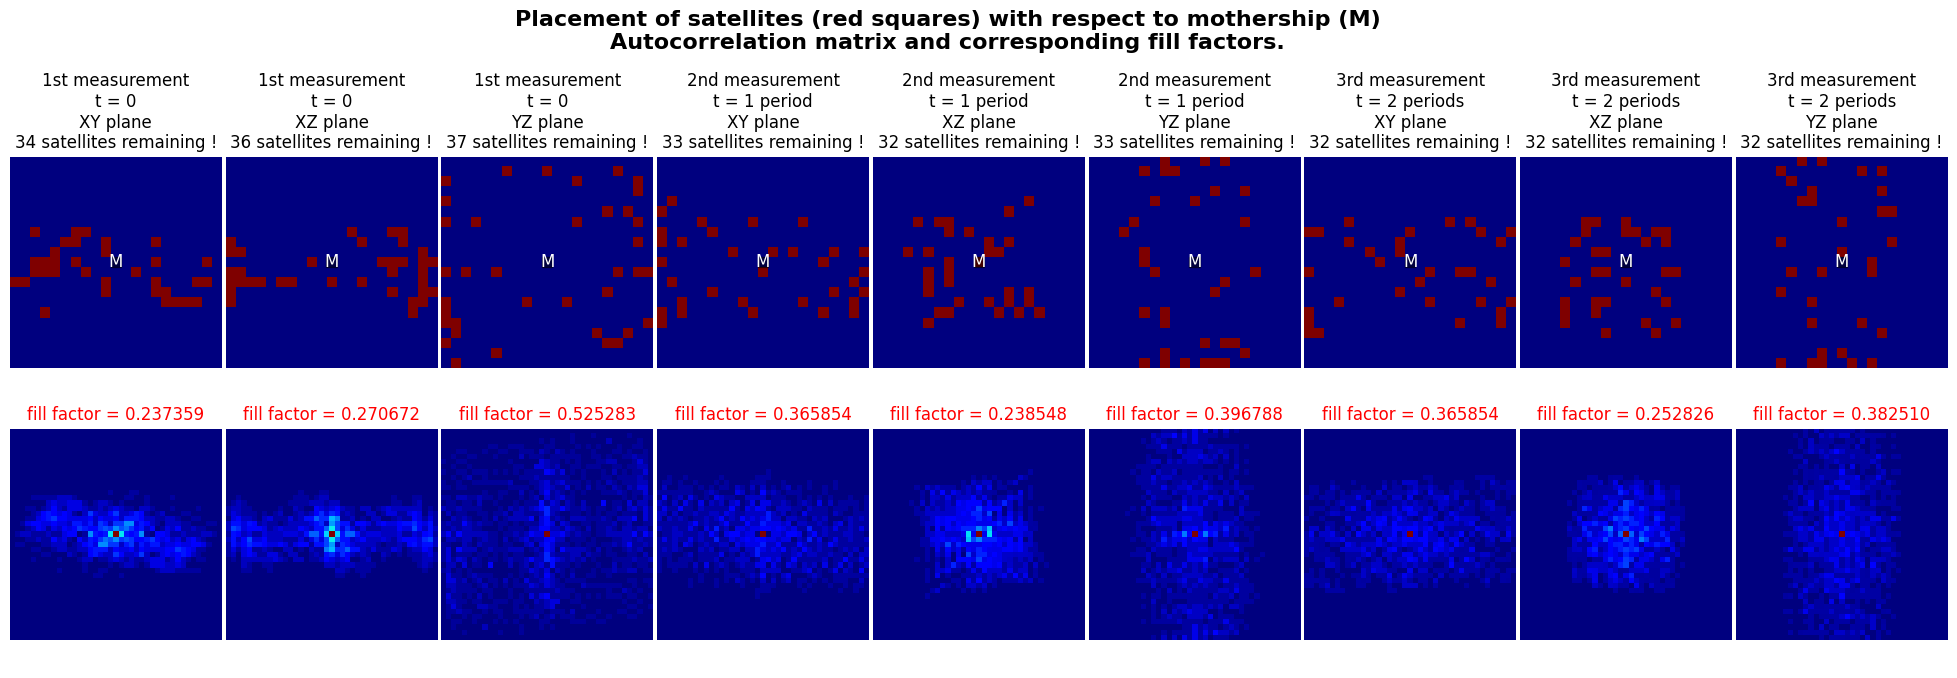

In [10]:
UDP_medium = init_medium_problem()
algo = pg.algorithm(
    pg.de1220(
        gen=10000, 
        allowed_variants=[i for i in range(1, 19)],
        variant_adptv=1,
        ftol=0,
        xtol=1e-3, 
        memory=True
        )
    )
algo.set_verbosity(2)
prob = pg.problem(UDP_medium) 
pop = pg.population(prob,size=750)
evolve = algo.evolve(pop) 

print_result(UDP_medium,  evolve.champion_x)
del algo, prob, pop, UDP_medium